Question 1. We should care more about True Positive rate and True Negative rate  more than accuracy

Question 2. A

Question 3. A

Question 4. D

Question 5: ??

Question 6. B

Question 7. D

Question 8. B

Question 9. B

Question 10. Classification: classify whether a flight is delayed.
Regression: whether a flight is delayed and how long?


In [1]:

import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


import category_encoders as ce


import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Vicohub/airline-delay-and-cancellation-data-2009-2018/2018.csv")


In [4]:

data.head()

data.info()

info1= data.describe()
print(info1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [5]:

#checking data, null 
data.isna().sum()


FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [6]:

data.ORIGIN.unique()
data.ORIGIN.isnull().sum()


data.DEST.unique()
data.DEST.isnull().sum()


data.DIVERTED.unique()
data.DIVERTED.isnull().sum()
data.groupby(['DIVERTED'], as_index=False).count()

data.DEP_TIME.unique()
data.DEP_TIME.isnull().sum()
data.groupby(['DEP_TIME'], as_index=False).count()

data.DEP_DELAY.unique()
data.DEP_DELAY.isnull().sum()
data.groupby(['DEP_DELAY'], as_index=False).count()

data.TAXI_OUT.unique()
data.TAXI_OUT.isnull().sum()
data.groupby(['TAXI_OUT'], as_index=False).count()

 


data.LATE_AIRCRAFT_DELAY.unique()
data.LATE_AIRCRAFT_DELAY.isnull().sum() #too many NULL value --> ignore this column

data.SECURITY_DELAY.unique()
data.SECURITY_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['SECURITY_DELAY'], as_index=False).count()


data.NAS_DELAY.unique()
data.NAS_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['NAS_DELAY'], as_index=False).count()

data.WEATHER_DELAY.unique()
data.WEATHER_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['WEATHER_DELAY'], as_index=False).count()

data.CARRIER_DELAY.unique()
data.CARRIER_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['CARRIER_DELAY'], as_index=False).count()

data.DISTANCE.unique()
data.DISTANCE.isnull().sum()
data.groupby(['DISTANCE'], as_index=False).count()

data.AIR_TIME.unique()
data.AIR_TIME.isnull().sum()
data.groupby(['AIR_TIME'], as_index=False).count()

data.ACTUAL_ELAPSED_TIME.unique()
data.ACTUAL_ELAPSED_TIME.isnull().sum()
data.groupby(['ACTUAL_ELAPSED_TIME'], as_index=False).count()



data.CRS_ELAPSED_TIME.unique()
data.CRS_ELAPSED_TIME.isnull().sum()
data.groupby(['CRS_ELAPSED_TIME'], as_index=False).count()

data.CRS_DEP_TIME.unique()
data.CRS_DEP_TIME.isnull().sum()
data.groupby(['CRS_DEP_TIME'], as_index=False).count()


CRS_DEP_TIME  FL_DATE  OP_CARRIER  OP_CARRIER_FL_NUM  ORIGIN  DEST  \
0                1      119         119                119     119   119   
1                2        2           2                  2       2     2   
2                3       83          83                 83      83    83   
3                4      174         174                174     174   174   
4                5      643         643                643     643   643   
...            ...      ...         ...                ...     ...   ...   
1364          2355     3136        3136               3136    3136  3136   
1365          2356      439         439                439     439   439   
1366          2357      466         466                466     466   466   
1367          2358      407         407                407     407   407   
1368          2359     6165        6165               6165    6165  6165   

      DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0          116        116       116         116  ...               119   
1            2          2         2           2  ...                 2   
2           83         83        83          83  ...                83   
3          173        173       173         173  ...               174   
4          638        638       638         638  ...               643   
...        ...        ...       ...         ...  ...               ...   
1364      3103       3103      3103        3103  ...              3136   
1365       430        430       430         430  ...               439   
1366       463        463       463         463  ...               466   
1367       400        400       399         399  ...               407   
1368      6096       6096      6094        6094  ...              6165   

      ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                     115       115       119             18             18   
1                       2         2         2              1              1   
2                      83        83        83             18             18   
3                     173       173       174             45             45   
4                     637       637       643            137            137   
...                   ...       ...       ...            ...            ...   
1364                 3093      3093      3136            516            516   
1365                  430       430       439            119            119   
1366                  463       463       466             75             75   
1367                  397       397       407             74             74   
1368                 6084      6084      6165           1318           1318   

      NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 27  
0            18              18                   18            0  
1             1               1                    1            0  
2            18              18                   18            0  
3            45              45                   45            0  
4           137             137                  137            0  
...         ...             ...                  ...          ...  
1364        516             516                  516            0  
1365        119             119                  119            0  
1366         75              75                   75            0  
1367         74              74                   74            0  
1368       1318            1318                 1318            0  

[1369 rows x 28 columns]

In [8]:
cor=data.corr()
#sn.heatmap(cor, annot=True)
#plt.show()
print(cor)


                     OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  \
OP_CARRIER_FL_NUM             1.000000      0.008714  0.013390   0.009536   
CRS_DEP_TIME                  0.008714      1.000000  0.960140   0.104891   
DEP_TIME                      0.013390      0.960140  1.000000   0.139855   
DEP_DELAY                     0.009536      0.104891  0.139855   1.000000   
TAXI_OUT                      0.067915      0.001230  0.010476   0.056224   
WHEELS_OFF                    0.021422      0.934320  0.971433   0.129893   
WHEELS_ON                     0.016728      0.636633  0.659929   0.037976   
TAXI_IN                      -0.016601     -0.048328 -0.044007   0.009718   
CRS_ARR_TIME                  0.016117      0.688942  0.689393   0.090503   
ARR_TIME                      0.020334      0.608829  0.631263   0.030367   
ARR_DELAY                     0.019078      0.095260  0.130637   0.957282   
CANCELLED                     0.038877      0.017984  0.008084   0.026628   

In [9]:

#clean data

#fill NA=0
data.ARR_DELAY.fillna(value=0, inplace=True)
data.AIR_TIME.fillna(value=0, inplace=True)
data.ACTUAL_ELAPSED_TIME.fillna(value=0, inplace=True)
data.CRS_ELAPSED_TIME.fillna(value=0, inplace=True)
data.DEP_DELAY.fillna(value=0, inplace=True)
data.WHEELS_ON.fillna(value=0, inplace=True)
data.TAXI_IN.fillna(value=0, inplace=True)


#drop useless column

data.drop(['Unnamed: 27','CANCELLATION_CODE','LATE_AIRCRAFT_DELAY','SECURITY_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY'], inplace=True, axis=1)

data.drop(['OP_CARRIER_FL_NUM','DEP_TIME','ARR_TIME','ACTUAL_ELAPSED_TIME'], inplace=True, axis=1)


#remove cancel flight
data=data[data['CANCELLED'] == 0 ] 

In [10]:
# get top 50 airport with most flight

#Depart count for Airport 
OrgAirport=data.groupby(['ORIGIN'], as_index=False).agg(        
    {      
         'FL_DATE': "count"
    }
)

OrgAirport.rename(columns = {'FL_DATE':'DepartCount', 'ORIGIN': 'Airport' }, inplace = True)


#Arrival count for Airport 

DestAirport=data.groupby(['DEST'], as_index=False).agg(
    {      
         'FL_DATE': "count"        
    })


DestAirport.rename(columns = {'FL_DATE':'ArrivalCount', 'DEST': 'Airport'}, inplace = True)


#merge 2 data set

Airport= pd.merge(OrgAirport, DestAirport, on='Airport')
Airport['Total']=Airport['DepartCount'] + Airport['ArrivalCount']


TopAirport=Airport.sort_values('Total', ascending=False).head(50)


filteredData = data[data.ORIGIN.isin(TopAirport["Airport"]) | data.DEST.isin(TopAirport["Airport"])]



#a1=filteredData.ORIGIN.unique()
#a2=filteredData.DEST.unique()


#ARR_DELAY>0 --> isdelay=true
filteredData["isdelay"] = filteredData['ARR_DELAY']>0 #--> isdelay=true

# convert column "a" of a DataFrame
filteredData["FL_DATE"] = pd.to_datetime(filteredData["FL_DATE"])


#remove original data frame for saving memory
del data

filteredData.head()
filteredData.info()

<ipython-input-10-8ae54575361c>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData["isdelay"] = filteredData['ARR_DELAY']>0 #--> isdelay=true


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   OP_CARRIER        object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   DEP_DELAY         float64       
 6   TAXI_OUT          float64       
 7   WHEELS_OFF        float64       
 8   WHEELS_ON         float64       
 9   TAXI_IN           float64       
 10  CRS_ARR_TIME      int64         
 11  ARR_DELAY         float64       
 12  CANCELLED         float64       
 13  DIVERTED          float64       
 14  CRS_ELAPSED_TIME  float64       
 15  AIR_TIME          float64       
 16  DISTANCE          float64       
 17  isdelay           bool          
dtypes: bool(1), datetime64[ns](1), float64(11), int64(2), object(3)
memory usage: 967.6+ MB


<ipython-input-10-8ae54575361c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData["FL_DATE"] = pd.to_datetime(filteredData["FL_DATE"])


#predict isDelay (binary classification)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [12]:

x= filteredData.iloc [:, :17]
y= filteredData.iloc[:, 17:]


#x["OP_CARRIER_FL_NUM"]  = x["OP_CARRIER_FL_NUM"].astype("string_")

x.info()
y.info()


#del filteredData


x.drop(['FL_DATE'], inplace=True, axis=1)
#we predict isdelay, so this coulmn shout not use as feature 
x.drop('ARR_DELAY', inplace=True, axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   OP_CARRIER        object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   DEP_DELAY         float64       
 6   TAXI_OUT          float64       
 7   WHEELS_OFF        float64       
 8   WHEELS_ON         float64       
 9   TAXI_IN           float64       
 10  CRS_ARR_TIME      int64         
 11  ARR_DELAY         float64       
 12  CANCELLED         float64       
 13  DIVERTED          float64       
 14  CRS_ELAPSED_TIME  float64       
 15  AIR_TIME          float64       
 16  DISTANCE          float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(3)
memory usage: 961.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
D

In [13]:


#Converting Categorical Features
#binary encoding 
encoder = ce.BinaryEncoder(cols=['OP_CARRIER'])
dfbin=encoder.fit_transform(x['OP_CARRIER'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['OP_CARRIER'],axis=1,inplace=True)

encoder = ce.BinaryEncoder(cols=['ORIGIN'])
dfbin=encoder.fit_transform(x['ORIGIN'])

x = pd.concat([x,dfbin],axis=1)


x.drop(['ORIGIN'],axis=1,inplace=True)


encoder = ce.BinaryEncoder(cols=['DEST'])
dfbin=encoder.fit_transform(x['DEST'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['DEST'],axis=1,inplace=True)

#scaler = StandardScaler()
#x = scaler.fit_transform(x)

del dfbin

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 38 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CRS_DEP_TIME      int64  
 1   DEP_DELAY         float64
 2   TAXI_OUT          float64
 3   WHEELS_OFF        float64
 4   WHEELS_ON         float64
 5   TAXI_IN           float64
 6   CRS_ARR_TIME      int64  
 7   CANCELLED         float64
 8   DIVERTED          float64
 9   CRS_ELAPSED_TIME  float64
 10  AIR_TIME          float64
 11  DISTANCE          float64
 12  OP_CARRIER_0      int64  
 13  OP_CARRIER_1      int64  
 14  OP_CARRIER_2      int64  
 15  OP_CARRIER_3      int64  
 16  OP_CARRIER_4      int64  
 17  OP_CARRIER_5      int64  
 18  ORIGIN_0          int64  
 19  ORIGIN_1          int64  
 20  ORIGIN_2          int64  
 21  ORIGIN_3          int64  
 22  ORIGIN_4          int64  
 23  ORIGIN_5          int64  
 24  ORIGIN_6          int64  
 25  ORIGIN_7          int64  
 26  ORIGIN_8      

In [15]:

#create test dta, training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [16]:

#create model
model = Sequential()
model.add(Dense(38, input_dim=38, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [17]:

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=X_train,y=y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=1) 

Epoch 1/10
52482/52482 [==============================] - 65s 1ms/step - loss: 0.3013 - accuracy: 0.9462 - val_loss: 0.0369 - val_accuracy: 0.9873
Epoch 2/10
52482/52482 [==============================] - 67s 1ms/step - loss: 0.0627 - accuracy: 0.9769 - val_loss: 0.0490 - val_accuracy: 0.9743
Epoch 3/10
52482/52482 [==============================] - 68s 1ms/step - loss: 0.0439 - accuracy: 0.9829 - val_loss: 0.0966 - val_accuracy: 0.9597
Epoch 4/10
52482/52482 [==============================] - 68s 1ms/step - loss: 0.0370 - accuracy: 0.9853 - val_loss: 0.0776 - val_accuracy: 0.9669
Epoch 5/10
52482/52482 [==============================] - 70s 1ms/step - loss: 0.0329 - accuracy: 0.9871 - val_loss: 0.0174 - val_accuracy: 0.9961
Epoch 6/10
52482/52482 [==============================] - 70s 1ms/step - loss: 0.0292 - accuracy: 0.9886 - val_loss: 0.0132 - val_accuracy: 0.9984
Epoch 7/10
52482/52482 [==============================] - 77s 1ms/step - loss: 0.0279 - accuracy: 0.9892 - val_loss: 0

In [18]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.979, Test: 0.979


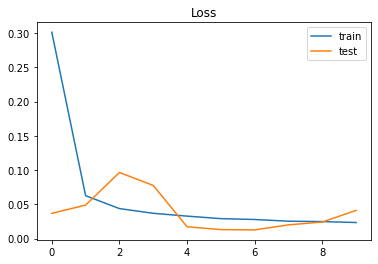

In [19]:


# plot loss during training
plt.subplot(111)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()


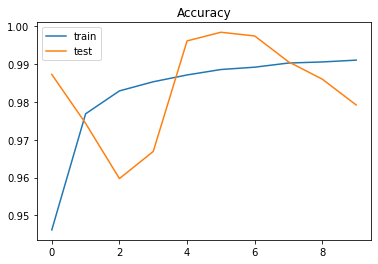

In [20]:
# plot accuracy during training
plt.subplot(111)
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

    *predict ARR_DELAY (regression)

In [21]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from keras.optimizers import SGD
from keras.optimizers import Adam

In [22]:

x= filteredData.iloc [:, :17]
y= filteredData['ARR_DELAY']


#x["OP_CARRIER_FL_NUM"]  = x["OP_CARRIER_FL_NUM"].astype("string_")

x.info()

print(y)


#del filteredData


x.drop(['FL_DATE'], inplace=True, axis=1)
#we predict ARR_DELAY, so not use this column in x
x.drop('ARR_DELAY', inplace=True, axis=1)



#Converting Categorical Features
#binary encoding 
encoder = ce.BinaryEncoder(cols=['OP_CARRIER'])
dfbin=encoder.fit_transform(x['OP_CARRIER'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['OP_CARRIER'],axis=1,inplace=True)

encoder = ce.BinaryEncoder(cols=['ORIGIN'])
dfbin=encoder.fit_transform(x['ORIGIN'])

x = pd.concat([x,dfbin],axis=1)


x.drop(['ORIGIN'],axis=1,inplace=True)


encoder = ce.BinaryEncoder(cols=['DEST'])
dfbin=encoder.fit_transform(x['DEST'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['DEST'],axis=1,inplace=True)

del dfbin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   OP_CARRIER        object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   DEP_DELAY         float64       
 6   TAXI_OUT          float64       
 7   WHEELS_OFF        float64       
 8   WHEELS_ON         float64       
 9   TAXI_IN           float64       
 10  CRS_ARR_TIME      int64         
 11  ARR_DELAY         float64       
 12  CANCELLED         float64       
 13  DIVERTED          float64       
 14  CRS_ELAPSED_TIME  float64       
 15  AIR_TIME          float64       
 16  DISTANCE          float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(3)
memory usage: 961.0+ MB
0         -23.0
1         -24.0
2         -13.0
3          -2.0
4          14.0
 

In [23]:

#standardize the dataset
sc = StandardScaler()#MinMaxScaler()#StandardScaler()
sc.fit(x)
x = sc.transform(x)
           
print(x[:10, :])
# convert the array back to a dataframe
x = pd.DataFrame(x)
x.info()

[[ 0.38287635 -0.33495575 -0.2499688   0.33319265  0.46781472  0.39035116
   0.49997568  0.         -0.05003862  1.71367656  1.58904489  1.33126658
   0.         -0.6667882  -0.89620183 -0.85811344 -1.01408028  1.23178278
   0.         -0.14803394 -0.31904159 -0.50121894 -0.708174   -0.86622735
  -1.07675635 -0.94274009 -1.07762939  1.12805177  0.         -0.14719044
  -0.32338268 -0.42665985 -0.85204612 -0.79074988 -1.01225184 -0.80384347
  -1.0193843   0.91457788]
 [-0.43543322 -0.40210185 -0.65231708 -0.47430139 -0.44648078 -0.10283428
  -0.44634604  0.         -0.05003862 -0.58143068 -0.65113672 -0.64977503
   0.         -0.6667882  -0.89620183 -0.85811344 -1.01408028  1.23178278
   0.         -0.14803394 -0.31904159 -0.50121894 -0.708174   -0.86622735
  -1.07675635 -0.94274009  0.92796282 -0.88648414  0.         -0.14719044
  -0.32338268 -0.42665985 -0.85204612 -0.79074988 -1.01225184 -0.80384347
   0.98098431 -1.09340059]
 [ 0.01239789 -0.33495575 -0.2499688  -0.02613233  0.31636

In [24]:

#create test dta, training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [25]:

#create model
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


In [26]:

# Compile model
opt = Adam(learning_rate=0.1) #SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

hist = model.fit(x=X_train,y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1) 


Epoch 1/10
41001/41001 [==============================] - 57s 1ms/step - loss: 11.9919 - val_loss: 0.3065
Epoch 2/10
41001/41001 [==============================] - 48s 1ms/step - loss: 3.2869 - val_loss: 2.0052
Epoch 3/10
41001/41001 [==============================] - 55s 1ms/step - loss: 4.6692 - val_loss: 0.2043
Epoch 4/10
41001/41001 [==============================] - 50s 1ms/step - loss: 3.2358 - val_loss: 0.2117
Epoch 5/10
41001/41001 [==============================] - 55s 1ms/step - loss: 2.6326 - val_loss: 0.6519
Epoch 6/10
41001/41001 [==============================] - 54s 1ms/step - loss: 3.5267 - val_loss: 0.7724
Epoch 7/10
41001/41001 [==============================] - 49s 1ms/step - loss: 3.2892 - val_loss: 0.3048
Epoch 8/10
41001/41001 [==============================] - 49s 1ms/step - loss: 3.0866 - val_loss: 0.2615
Epoch 9/10
41001/41001 [==============================] - 52s 1ms/step - loss: 3.1031 - val_loss: 0.2906
Epoch 10/10
41001/41001 [=============================

In [27]:

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


Train: 3.466, Test: 3.412


In [41]:

#predict some data
predictions = model.predict(X_test[:500])


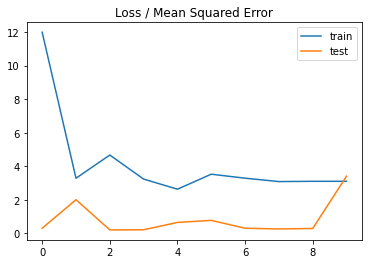

In [29]:

# plot loss during training

plt.subplot(111)
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()


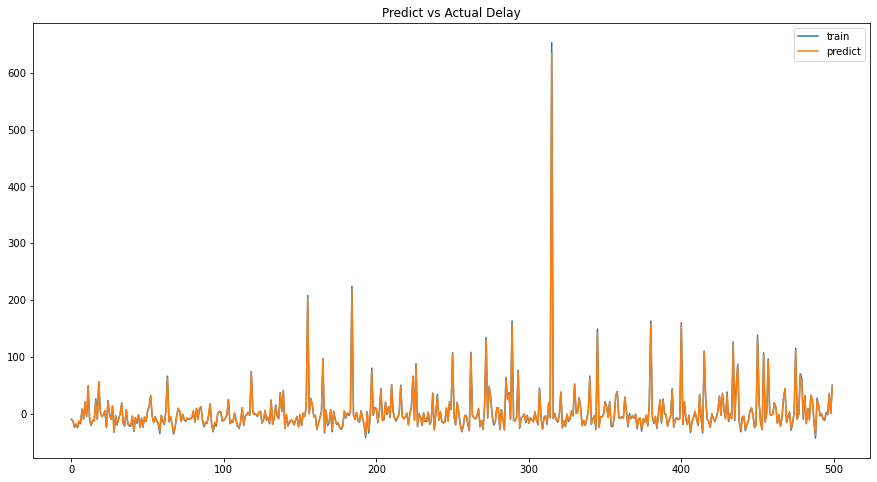

In [43]:

#plot some predict and actual value
predictValue = pd.DataFrame(data= predictions[0:500])
predictValue["real val"] = y_test[0:500].array
index = np.arange(500)

fig, ax = plt.subplots(1,1,figsize=(15, 8))

plt.title('Predict vs Actual Delay')
plt.plot(index,y_test[0:500], label='train')
plt.plot(index, predictions[0:500], label='predict')
plt.legend()
plt.show()
